In [ ]:
# import statements

from google.colab import files
import numpy as np
import io
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
# uploading the training data
uploaded_train = files.upload()

Saving dataset_1.csv to dataset_1.csv


In [ ]:
# reading data from dataset-1

df1 = pd.read_csv(io.BytesIO(uploaded_train['dataset_1.csv']),delimiter='\t')

dataset_1 = df1.to_numpy()
dataset_1 = dataset_1.transpose()
print(dataset_1.shape)


(65, 536)


1(a) Finding the LDA of the dataset-1.

In [ ]:
class LDA:

  def __init__(self,n_features = None):
    
    self.n_features = n_features
    self.transformed_dataset = []
    self.LDA_vecs = []
    self.dataset_label = []
  
  def fit(self,dataset):
    label_ds_1 = dataset[-1]
    self.dataset_label = dataset[-1]
    
    # class-0 datas
    i_class_0 = np.where(label_ds_1 == 0)[0]
    class_0_ds_1 = []
    for i in dataset_1:
      class_0_ds_1 += [i[i_class_0]]
    class_0_ds_1 = np.array(class_0_ds_1)
    class_0_ds_1 = class_0_ds_1.transpose()

    # class-1 datas
    i_class_1 = np.where(label_ds_1 == 1)[0]
    class_1_ds_1 = []
    for i in dataset_1:
      class_1_ds_1 += [i[i_class_1]]
    class_1_ds_1 = np.array(class_1_ds_1)
    class_1_ds_1 = class_1_ds_1.transpose()

    # class-2 datas
    i_class_2 = np.where(label_ds_1 == 2)[0]
    class_2_ds_1 = []
    for i in dataset_1:
      class_2_ds_1 += [i[i_class_2]]
    class_2_ds_1 = np.array(class_2_ds_1)
    class_2_ds_1 = class_2_ds_1.transpose()


    # class-0
    mean_class_0_ds_1 = class_0_ds_1.mean(axis=0)
    mean_class_1_ds_1 = class_1_ds_1.mean(axis=0)
    mean_class_2_ds_1 = class_2_ds_1.mean(axis=0)

    # calculating the Sw

    Sw_class_0 = np.zeros([class_0_ds_1.shape[1],class_0_ds_1.shape[1]])
    # class-0
    for i in range(class_0_ds_1.shape[0]):
      data = class_0_ds_1[i]
      data = data - mean_class_0_ds_1
      Sw_class_0 += data.reshape(65,-1).dot(data.reshape(1,-1))


    Sw_class_1 = np.zeros([class_1_ds_1.shape[1],class_1_ds_1.shape[1]])
    # class-0
    for i in range(class_1_ds_1.shape[0]):
      data = class_1_ds_1[i]
      data = data - mean_class_1_ds_1
      Sw_class_1 += data.reshape(65,-1).dot(data.reshape(1,-1))


    Sw_class_2 = np.zeros([class_2_ds_1.shape[1],class_2_ds_1.shape[1]])
    # class-0
    for i in range(class_2_ds_1.shape[0]):
      data = class_2_ds_1[i]
      data = data - mean_class_2_ds_1
      Sw_class_2 += data.reshape(65,-1).dot(data.reshape(1,-1))

    Sw = Sw_class_0 + Sw_class_1 + Sw_class_2

    # calculating Sb
    Sb = np.zeros([65,65])

    total_mean = dataset_1.transpose().mean(axis=0)

    data_0 = mean_class_0_ds_1 - total_mean
    Sb += data_0.reshape(65,-1).dot(data_0.reshape(1,-1))
    data_1 = mean_class_1_ds_1 - total_mean
    Sb += data_1.reshape(65,-1).dot(data_1.reshape(1,-1))
    data_2 = mean_class_2_ds_1 - total_mean
    Sb += data_2.reshape(65,-1).dot(data_2.reshape(1,-1))


    S = np.linalg.pinv(Sw).dot(Sb)
    U, Sigma, VT = np.linalg.svd(S)
    U = U.transpose()

    for i in range(self.n_features):
      self.LDA_vecs += [U[i]]
    self.LDA_vecs = np.array(self.LDA_vecs)

    
    dataset_transpose = dataset.transpose()

    for data in dataset_transpose :

      coord = []
      for i in range(self.n_features):
        coord += [np.linalg.norm(self.LDA_vecs[i].reshape(1,-1).dot(data.reshape(65,-1)))]
      
      self.transformed_dataset += [coord]

    self.transformed_dataset = np.array(self.transformed_dataset)
    self.transformed_dataset = self.transformed_dataset.transpose()

    # returns with columns as data points and rows as features for easy access

In [ ]:
def plotting_scatter_plot(x1,x2,label,title):
  
  i_label_0 = np.where(label == 0)
  i_label_1 = np.where(label == 1)
  i_label_2 = np.where(label == 2)

  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

  ax.scatter(x1[i_label_0], x2[i_label_0],label="0")
  ax.scatter(x1[i_label_1], x2[i_label_1],label="1")
  ax.scatter(x1[i_label_2], x2[i_label_2],label="2")

  ax.set_title(title)
  ax.set_xlabel('X1')
  ax.set_ylabel('X2')
  ax.legend()

  plt.show()
  


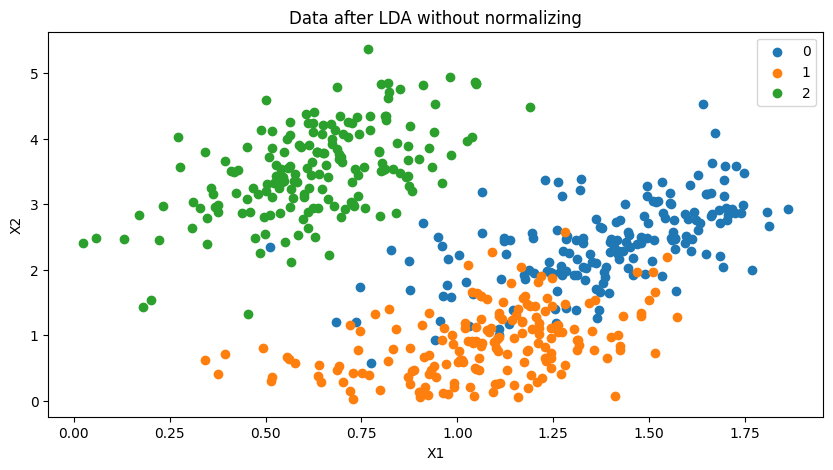

In [ ]:
lda = LDA(n_features = 2)

lda.fit(dataset_1)

x1_lda = lda.transformed_dataset[0]
x2_lda = lda.transformed_dataset[1]
label_lda = lda.dataset_label

plotting_scatter_plot(x1_lda,x2_lda,label_lda,"Data after LDA without normalizing")



In [ ]:
from sklearn.metrics import silhouette_score

dataset_2d_lda = np.zeros((len(x1_lda),2))

dataset_2d_lda[:,0] = x1_lda
dataset_2d_lda[:,1] = x2_lda

print("the silhouette score of the dataset after LDA without normalization ",silhouette_score(dataset_2d_lda , label_lda))

the silhouette score of the dataset after LDA without normalization  0.4215767319741845


In [ ]:
# applying mean normalization and unit variance normalization using built in function on the dataset

def data_normalization(dataset):  

# create a StandardScaler object
    scaler = StandardScaler()

    # fit the scaler to the data
    scaler.fit(dataset)

    # transform the data using the scaler
    dataset_normalized = scaler.transform(dataset)

    dataset_normalized[-1] = dataset[-1]

    return dataset_normalized



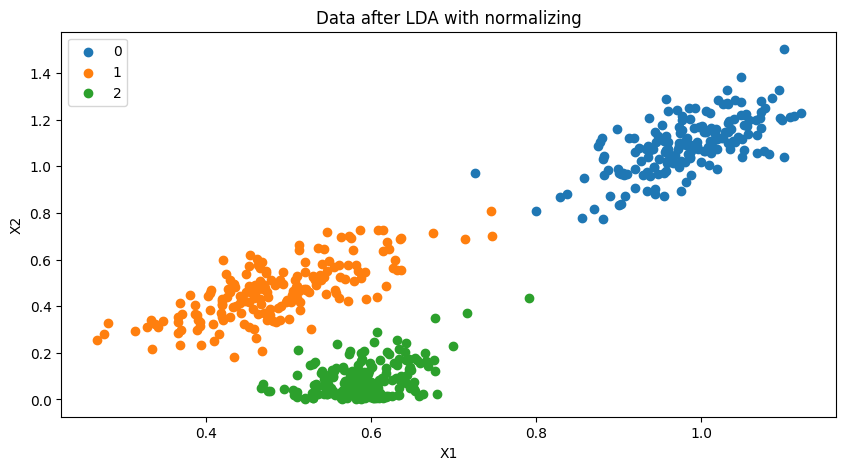

In [ ]:
normalized_dataset_1 = data_normalization(dataset_1)

lda = LDA(n_features = 2)

lda.fit(normalized_dataset_1)

x1_normalized = lda.transformed_dataset[0]
x2_normalized = lda.transformed_dataset[1]
label_normalized = lda.dataset_label

plotting_scatter_plot(x1_normalized,x2_normalized,label_normalized,"Data after LDA with normalizing")


In [ ]:
from sklearn.metrics import silhouette_score

dataset_2d_lda = np.zeros((len(x1_lda),2))

dataset_2d_lda[:,0] = x1_normalized
dataset_2d_lda[:,1] = x2_normalized

print("the silhouette score of the dataset after LDA with normalization ",silhouette_score(dataset_2d_lda , label_normalized))

the silhouette score of the dataset after LDA with normalization  0.6829114841997749


b) Finding the PCA data of the dataset-1

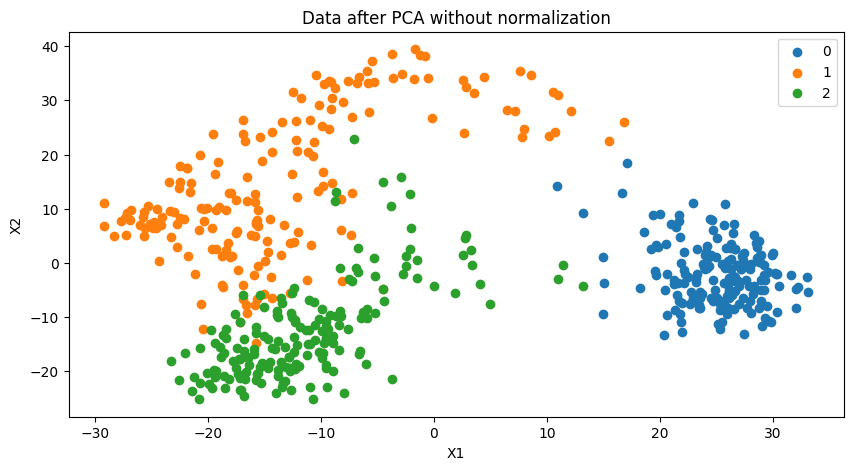

In [ ]:
# Instantiate a PCA object to transform the data into 2 dimensions
pca = PCA(n_components=2)

# Fit the PCA object to the data and transform the data into 2 dimensions
transformed_data = pca.fit_transform(dataset_1.transpose())

x1_pca = transformed_data.transpose()[0]
x2_pca = transformed_data.transpose()[1]
label_pca = dataset_1[-1]

plotting_scatter_plot(x1_pca,x2_pca,label_pca,"Data after PCA without normalization")


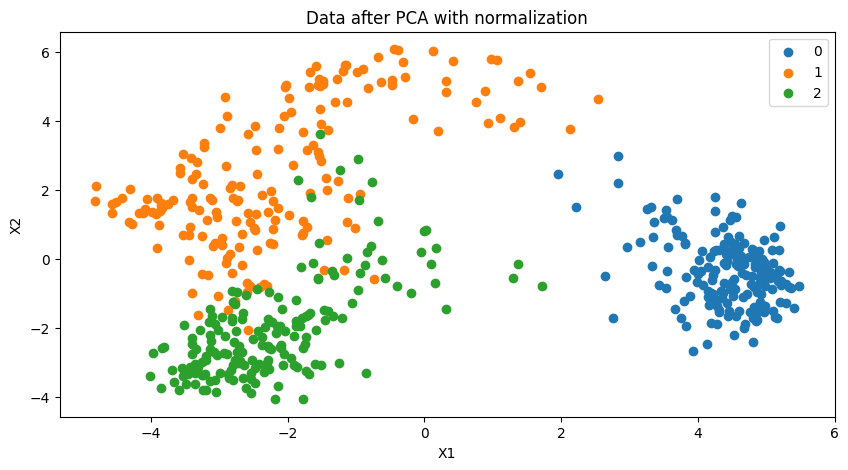

In [ ]:
# Instantiate a PCA object to transform the data into 2 dimensions
pca = PCA(n_components=2)

# Fit the PCA object to the data and transform the data into 2 dimensions
transformed_data = pca.fit_transform(normalized_dataset_1.transpose())

x1_pca = transformed_data.transpose()[0]
x2_pca = transformed_data.transpose()[1]
label_pca = dataset_1[-1]

plotting_scatter_plot(x1_pca,x2_pca,label_pca,"Data after PCA with normalization")


c) Seperating the data into training and testing data(80:20). Applying naive bayes classifier on the data.(**Considering I cov of each class**)

In [ ]:
# Using the classifier made in Assignment-1-QUestion-2

# Defining a class for naive bayes classifier and also defining it's methods

class Naive_Bayes_classifier:

  def __init__(self,cov): # cov --> covariance matrix 
    self.cov = cov  # this can be 3 dimensional matrix(when cov matrix different for different classes) or a 2 dimensional matrix(when cov matrix same for all classes)

  def fit(self,X,Y,label):          # fitting model into the input data
    self.classes = np.unique(label)
    self.num_of_classes = len(self.classes)
    self.num_of_features = 2
    
    self.prior = np.zeros(self.num_of_classes)
    self.mean = np.zeros((self.num_of_classes,self.num_of_features))
    self.var = np.zeros((self.num_of_classes,self.num_of_features))

    if self.cov.ndim == 3:           # if dimension of cov is 3
      for i in range(len(self.classes)):
        for j in range(2):
          self.var[i,j] = self.cov[i][j,j]
    else:                             # if dimension of cov is 2
      for i in range(self.cov.shape[0]):
        self.var[:,i] = self.cov[i,i]
    
    for c_i in range(len(self.classes)):
      X_c = X[np.argwhere(label == self.classes[c_i])]
      Y_c = Y[np.argwhere(label == self.classes[c_i])]

      self.mean[c_i,0] = np.mean(X_c)
      self.mean[c_i,1] = np.mean(Y_c)

      self.prior[c_i] = len(X_c)/len(X)

    
    
  def X_pdf(self,X,c_i):            # probability distribution function of the X variable

    mean = self.mean[c_i,0]*np.ones(len(X))
    var = self.var[c_i,0]*np.ones(len(X))

    return (1/(2*np.pi*(var**2))**0.5)*np.exp(-0.5*(((X-mean)/var)**2))

  def Y_pdf(self,Y,c_i):           # probaility distribution function of the Y variable

    mean = self.mean[c_i,1]*np.ones(len(Y))
    var = self.var[c_i,1]*np.ones(len(Y))

    return (1/(2*np.pi*(var**2))**0.5)*np.exp(-0.5*(((Y-mean)/var)**2)) 

  
  def predict(self,X_test,Y_test):      # predicts the classes of the input data points
    

    prob = np.zeros((len(X_test),self.num_of_classes))

    evidence = np.zeros(len(X_test))

    for c_i in range(len(self.classes)):

      P_x = self.X_pdf(X_test,c_i)
      P_y = self.Y_pdf(Y_test,c_i)
      
      evidence += P_x*P_y*self.prior[c_i]   


    for c_i in range(len(self.classes)):

      prior = self.prior[c_i]                

      P_x = self.X_pdf(X_test,c_i)           
      P_y = self.Y_pdf(Y_test,c_i)

      likelihood = P_x*P_y                 

      prob[:,c_i] = prior*likelihood

    
    return self.classes[np.argmax(prob, axis=1)]

n = math.floor(0.8*len(x1_lda))
x1_train = x1_lda[:n]
x2_train = x1_lda[:n]
label_train = label_lda[:n]

x1_test = x1_lda[n+1:]
x2_test = x2_lda[n+1:]
label_test = label_lda[n+1:]

# finding the (X,Y) for different classes

indices_train_0 = [i for i in range(len(label_train)) if label_train[i]==0]
indices_train_1 = [i for i in range(len(label_train)) if label_train[i]==1]
indices_train_2 = [i for i in range(len(label_train)) if label_train[i]==2]

indices_test_0 = [i for i in range(len(label_test)) if label_test[i]==0]
indices_test_1 = [i for i in range(len(label_test)) if label_test[i]==1]
indices_test_2 = [i for i in range(len(label_test)) if label_test[i]==2]

x1_train_0 = x1_train[indices_train_0]
x2_train_0 = x2_train[indices_train_0]

x1_train_1 = x1_train[indices_train_1]
x2_train_1 = x2_train[indices_train_1]

x1_train_2 = x1_train[indices_train_2]
x2_train_2 = x2_train[indices_train_2]


x1_test_0 = x1_test[indices_test_0]
x2_test_0 = x2_test[indices_test_0]

x1_test_1 = x1_test[indices_test_1]
x2_test_1 = x2_test[indices_test_1]

x1_test_2 = x1_test[indices_test_2]
x2_test_2 = x2_test[indices_test_2]

# finding the covariance matrix of each class
cov0 = np.array([[np.var(x1_train_0),0],[0,np.var(x2_train_0)]])
cov1 = np.array([[np.var(x1_train_1),0],[0,np.var(x2_train_1)]])
cov2 = np.array([[np.var(x1_train_2),0],[0,np.var(x2_train_2)]] )

# making the 3 dimensional covariance matrix
cov_2_e = np.array([cov0,cov1,cov2])

nbc = Naive_Bayes_classifier(cov_2_e)

nbc.fit(x1_train,x2_train,label_train)


i) Accuracy on training and testing data

In [ ]:
label_train_predicted = nbc.predict(x1_train,x2_train)
label_test_predicted = nbc.predict(x1_test,x2_test)

temp_train = label_train - label_train_predicted
temp_test = label_test-label_test_predicted

accuracy_train = (len(label_train)-len(np.where(temp_train == 0)))/len(label_train)
accuracy_test = (len(label_test)-len(np.where(temp_test == 0)))/len(label_test)

print("accuracy on train data is ",accuracy_train)
print("accuracy on test data is ",accuracy_test)

accuracy on train data is  0.9976635514018691
accuracy on test data is  0.9906542056074766


ii) Plotting test data along with classification boundary

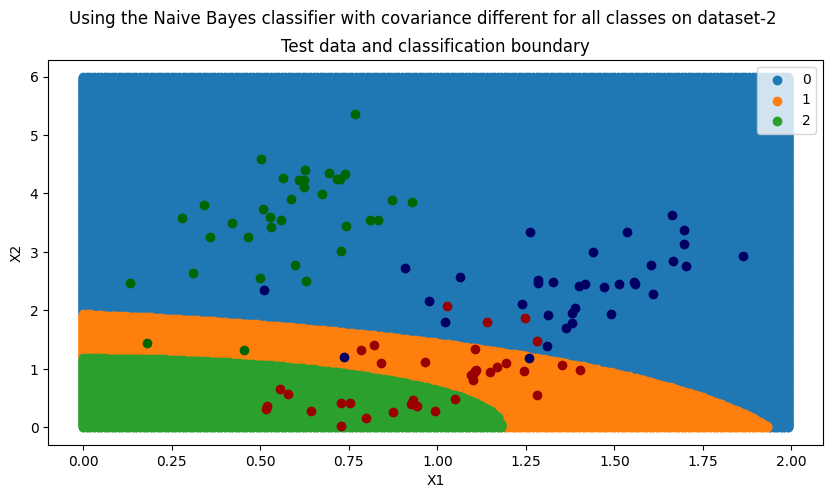

In [ ]:
class_boundary_X = []
class_boundary_Y = []

# generating multiple points in the space 
for x in np.arange(0,2,0.01):
  for y in np.arange(0,6,0.01):
    class_boundary_X += [x]
    class_boundary_Y += [y]

class_boundary_Y = np.array(class_boundary_Y)
class_boundary_X = np.array(class_boundary_X[:len(class_boundary_Y)])

# presicting the class of all the points generated above
pred_label_test_ds_2 = nbc.predict(class_boundary_X,class_boundary_Y)

indices_0 = [i for i in range(len(pred_label_test_ds_2)) if pred_label_test_ds_2[i]==0]
indices_1 = [i for i in range(len(pred_label_test_ds_2)) if pred_label_test_ds_2[i]==1]
indices_2 = [i for i in range(len(pred_label_test_ds_2)) if pred_label_test_ds_2[i]==2]

class_boundary_X_0 = class_boundary_X[indices_0]
class_boundary_Y_0 = class_boundary_Y[indices_0]

class_boundary_X_1 = class_boundary_X[indices_1]
class_boundary_Y_1 = class_boundary_Y[indices_1]

class_boundary_X_2 = class_boundary_X[indices_2]
class_boundary_Y_2 = class_boundary_Y[indices_2]

i_label_0 = np.where(label_test == 0)
i_label_1 = np.where(label_test == 1)
i_label_2 = np.where(label_test == 2)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

ax.scatter(class_boundary_X_0, class_boundary_Y_0,label="0")
ax.scatter(class_boundary_X_1,class_boundary_Y_1,label="1")
ax.scatter(class_boundary_X_2, class_boundary_Y_2,label="2")
ax.scatter(x1_test_0, x2_test_0,color=(0, 0, 100/255))
ax.scatter(x1_test_1, x2_test_1,color=(155/255, 0, 0))
ax.scatter(x1_test_2, x2_test_2,color=(0, 100/255, 0))

ax.set_title('Test data and classification boundary')

fig.suptitle('Using the Naive Bayes classifier with covariance different for all classes on dataset-2')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.legend()

plt.show()

ii) Calculating the confusion matrix for training and testing data

In [ ]:
# Calculate the confusion matrix for training and testing data
# where rows depict the predicted values and the columns depict the actual values


conf_mat_test = np.zeros((3, 3))
for i in range(len(label_test)):
    conf_mat_test[int(label_test_predicted[i]), int(label_test[i])] += 1

conf_mat_train = np.zeros((3,3))
for i in range(len(label_train)):
    conf_mat_train[int(label_train_predicted[i]), int(label_train[i])] += 1

print("Confusion matrix of test data :\n", conf_mat_test)
print("Confusion matrix of train data :\n", conf_mat_train)

Confusion matrix of test data :
 [[33.  4. 33.]
 [ 2. 18.  2.]
 [ 0. 15.  0.]]
Confusion matrix of train data :
 [[108.  35.   0.]
 [ 29.  93.  24.]
 [  4.  17. 118.]]
